# Coding Exercises (Part 15)

## Financial Portfolios

## Self_guided

Import the us stocks dataset (__us_stocks.csv__) and select the 5-Year period from __31-12-2013__ (incl.) until __31-12-2018__ (incl.). Save the DataFrame in the variable __stocks__ and work through the next questions with this DataFrame!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
stocks=pd.read_csv("us_stocks.csv",header=[0,1],index_col=0,parse_dates=True).loc[:,"Adj Close"]["31-12-2013":"1-1-2019"]
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,83.891060,54.650002,22.291279,82.911514,68.759727,69.113091
2014-01-02,82.707558,54.709999,22.145308,82.381737,68.024887,69.306335
2014-01-03,82.975700,54.560001,22.136719,82.492821,67.948891,69.077980
2014-01-06,82.938721,57.200001,21.861942,81.903206,68.109367,68.691544
2014-01-07,82.624329,57.919998,21.973566,82.356094,68.768166,68.902321


Create __10,000 random portfolios__ where weights of constituents __sum up to 1__ (all weights must be __between 0 and 1__). Use __np.random.seed(123)__!

In [15]:
# count=1
# weights=[]
# while count<=1000:
#     wt=np.random.random_sample(6)
#     weights.append(wt)
#     count+=1
np.random.seed(123)
weights=np.random.random(stocks.shape[1]*1000).reshape(1000,stocks.shape[1])
weights=pd.DataFrame(weights)
weights.columns=stocks.columns
row_sum=weights.sum(axis=1)
# weights["sums"]=row_sum
# weights/weights.iloc[:,-1]
weights=weights.divide(row_sum,axis=0)
# weights=weights.iloc[:,:-1]
weights
# row_sum

,AXP,FB,INTC,MCD,PG,WMT
0,0.239885,0.098555,0.078134,0.189889,0.247806,0.145730
1,0.271614,0.189658,0.133190,0.108594,0.095040,0.201904
2,0.220141,0.029955,0.199798,0.370436,0.091602,0.088068
3,0.136903,0.136974,0.163392,0.218774,0.186586,0.157371
4,0.282189,0.126149,0.141316,0.089160,0.114726,0.246461
...,...,...,...,...,...,...
995,0.159481,0.007873,0.241659,0.004052,0.292326,0.294609
996,0.014295,0.034012,0.238237,0.152141,0.276551,0.284764
997,0.015918,0.129600,0.394941,0.116138,0.027961,0.315443
998,0.035599,0.210482,0.194003,0.177664,0.194757,0.187496


Calculate __annualized risk and return__ for the __six stocks__ and for the 10,000 __random portfolios__! Calculation shall be based on __daily__ returns (__simple__ returns). __Visualize__! (Use the user-defined function ann_risk_return)

In [16]:
daily_return_stocks=stocks.pct_change()
daily_return_stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.014108,0.001098,-0.006548,-0.006390,-0.010687,0.002796
2014-01-03,0.003242,-0.002742,-0.000388,0.001348,-0.001117,-0.003295
2014-01-06,-0.000446,0.048387,-0.012413,-0.007147,0.002362,-0.005594
2014-01-07,-0.003791,0.012587,0.005106,0.005530,0.009673,0.003068


In [17]:
weights.head()

,AXP,FB,INTC,MCD,PG,WMT
0,0.239885,0.098555,0.078134,0.189889,0.247806,0.145730
1,0.271614,0.189658,0.133190,0.108594,0.095040,0.201904
2,0.220141,0.029955,0.199798,0.370436,0.091602,0.088068
3,0.136903,0.136974,0.163392,0.218774,0.186586,0.157371
4,0.282189,0.126149,0.141316,0.089160,0.114726,0.246461


In [21]:
daily_return_port=daily_return_stocks.mul(weights.iloc[0]).dropna().sum(axis=1).to_frame()
daily_return_port.columns=["return"]
daily_return_port.head()

,return
Date,
2014-01-02,-0.007242
2014-01-03,-0.000024
2014-01-06,0.002105
2014-01-07,0.004624
2014-01-08,-0.005862


In [23]:
def ann_risk_return(returns_df):
    summary = returns_df.agg(["mean", "std"]).T
    summary.columns = ["Return", "Risk"]
    summary.Return = summary.Return*252
    summary.Risk = summary.Risk * np.sqrt(252)
    return summary

In [24]:
daily_return_port.head()

,return
Date,
2014-01-02,-0.007242
2014-01-03,-0.000024
2014-01-06,0.002105
2014-01-07,0.004624
2014-01-08,-0.005862


In [25]:
port_return_risk=ann_risk_return(daily_return_port)
port_return_risk

,Return,Risk
return,0.105159,0.125332


In [26]:
weights.shape[0]

1000

In [27]:
df_ls=[]

In [28]:
for i in range(0,weights.shape[0]):
    daily_return_port=daily_return_stocks.mul(weights.iloc[i]).dropna().sum(axis=1).to_frame()
    port_return_risk=ann_risk_return(daily_return_port)
    df_ls.append(port_return_risk)
return_risk=pd.concat(df_ls)   
return_risk.index=range(0,return_risk.shape[0])
return_risk

,Return,Risk
0,0.105159,0.125332
1,0.117619,0.141440
2,0.125457,0.132000
3,0.125908,0.130126
4,0.106849,0.136994
...,...,...
995,0.094192,0.135166
996,0.115470,0.131295
997,0.144811,0.156934
998,0.139379,0.138780


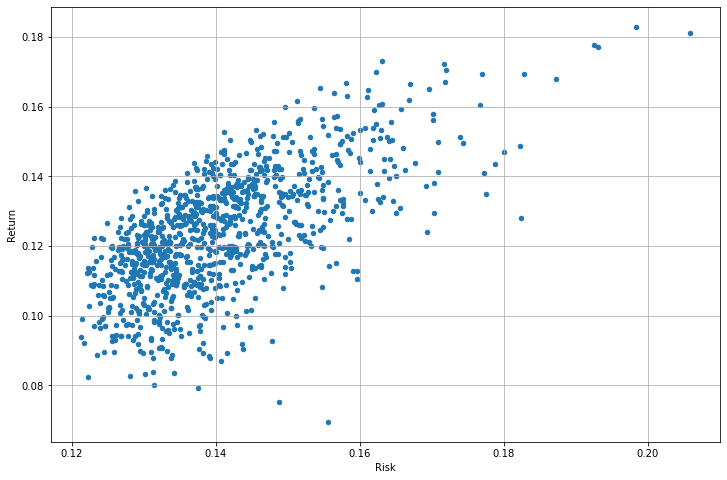

In [30]:
return_risk.plot(kind="scatter",y="Return",x="Risk",figsize=(12,8),grid=True)
plt.show()

Assume that the approximate __risk-free asset__ showed a return of __1.7%__ p.a. (5-Year US Treasury Note). __Calculate__ the __Sharpe Ratio__ for the __six stocks__ and for the 10,000 __random portfolios__! __Visualize__ again (Sharpe Ratio as "Third Dimension")!

In [31]:
stocks.head()

,AXP,FB,INTC,MCD,PG,WMT
Date,,,,,,
2013-12-31,83.891060,54.650002,22.291279,82.911514,68.759727,69.113091
2014-01-02,82.707558,54.709999,22.145308,82.381737,68.024887,69.306335
2014-01-03,82.975700,54.560001,22.136719,82.492821,67.948891,69.077980
2014-01-06,82.938721,57.200001,21.861942,81.903206,68.109367,68.691544
2014-01-07,82.624329,57.919998,21.973566,82.356094,68.768166,68.902321


In [32]:
rf=0.017
def get_sr(risk,rt):
    return (rt-rf)/risk

In [33]:
sr_stocks=ann_risk_return(daily_return_stocks)
sr_stocks.head()

,Return,Risk
AXP,0.044418,0.207027
FB,0.223580,0.299131
INTC,0.177555,0.246522
MCD,0.163971,0.164948
PG,0.065845,0.147473


In [34]:
sr_stocks["SharpRatio"]=get_sr(sr_stocks["Risk"], sr_stocks["Return"])

In [35]:
sr_stocks

,Return,Risk,SharpRatio
AXP,0.044418,0.207027,0.132435
FB,0.223580,0.299131,0.690599
INTC,0.177555,0.246522,0.651281
MCD,0.163971,0.164948,0.891011
PG,0.065845,0.147473,0.331215
WMT,0.076464,0.194218,0.306171


In [36]:
return_risk["SharpRatio"]=get_sr(return_risk["Risk"], return_risk["Return"])
return_risk

,Return,Risk,SharpRatio
0,0.105159,0.125332,0.703408
1,0.117619,0.141440,0.711392
2,0.125457,0.132000,0.821643
3,0.125908,0.130126,0.836946
4,0.106849,0.136994,0.655862
...,...,...,...
995,0.094192,0.135166,0.571087
996,0.115470,0.131295,0.749991
997,0.144811,0.156934,0.814425
998,0.139379,0.138780,0.881818


In [126]:
# cmap = "coolwarm", vmin = 0.5, vmax = 1.00, alpha = 0.8
plt.scatter?

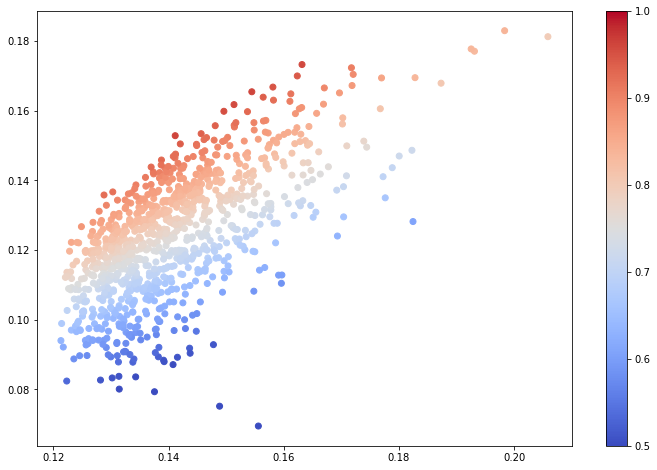

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(y=return_risk["Return"],x=return_risk["Risk"],c=return_risk["SharpRatio"],cmap="coolwarm",vmin=0.5,vmax=1)
plt.colorbar()
plt.show()

Search for the __Max Sharpe Ratio Portfolio__ (from the set of 10,000 random portfolios) and determine __risk, return and Sharpe Ratio__ of the Max Sharpe Ratio Portfolio!

In [38]:
return_risk["SharpRatio"].idxmax()

595

In [39]:
return_risk.loc[return_risk["SharpRatio"].idxmax()]

Return        0.152828
Risk          0.141150
SharpRatio    0.962292
Name: 595, dtype: float64

Determine the __weights of the constituents__ in the Max Sharpe Ratio Portfolio and, if your computing power allows for this, __increase__ the __number of random portfolios__. Which stocks do you think have an __actual weight of 0__ in the "real" Max Sharpe Ratio Portfolio that can be derived with Optimization Algorithms? Can you identify a __highly concentrated position__ in one Stock?  

In [40]:
return_risk["SharpRatio"].idxmax()

595

In [115]:
weights.loc[return_risk["SharpRatio"].idxmax()]

AXP     0.063848
FB      0.318752
INTC    0.225493
MCD     0.335008
PG      0.015671
WMT     0.041230
Name: 357, dtype: float64

# Recap

152. generate random matrix by generating random array and then reshaping

use np.`randam.random.reshape(m,n)` to get random weights

df=pd.DataFrame(array)

df.`columns`=`column_list` to define the column name 

159. generate scatters with different colors

`plt.scatter(c=df[col1])`

`plt.colorbar()` to show the colorbar

160. find the location of the max element

df.`idxmax`("col_name")